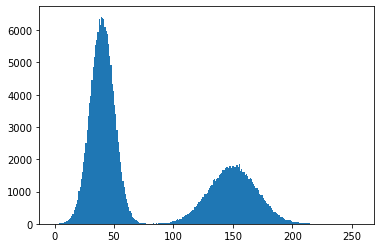

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
xrange =range 
# Create a sample image
np.random.seed(7)
img = np.random.normal(40,10,size=(500,500)).astype('uint8')
img[img>100]=40
img[100:400,100:400] = np.random.normal(150,20,size=(300,300)).astype('uint8')
 
# plot the histogram
hist = plt.hist(img.ravel(),256,[0,256])
plt.show()

In [5]:
# Set minimum value to infinity
final_min = np.inf
# total pixels in an image
total = np.sum(hist[0])
for i in range(256):
    # Split regions based on threshold
    left, right = np.hsplit(hist[0],[i])
    # Splt intensity values based on threshold
    left_bins, right_bins = np.hsplit(hist[1],[i])
    # Only perform thresholding if neither side empty
    if np.sum(left) !=0 and np.sum(right) !=0:
        # Calculate weights on left and right sides
        w_0 = np.sum(left)/total
        w_1 = np.sum(right)/total
        # Calculate the mean for both sides
        mean_0 = np.dot(left,left_bins)/np.sum(left)
        mean_1 = np.dot(right,right_bins[:-1])/np.sum(right)  # right_bins[:-1] because matplotlib has uses 1 bin extra
        # Calculate variance of both sides
        var_0 = np.dot(((left_bins-mean_0)**2),left)/np.sum(left)
        var_1 = np.dot(((right_bins[:-1]-mean_1)**2),right)/np.sum(right)
        # Calculate final within class variance
        final = w_0*var_0 + w_1*var_1
        # if variance minimum, update it
        if final<final_min:
            final_min = final
            thresh = i
        
print(thresh) # 95

95


In [8]:
gray = cv2.imread('C:/Users/DELL/Desktop/(noisy_fingerprint).tif',0)
retval, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


3550.294525712176 125


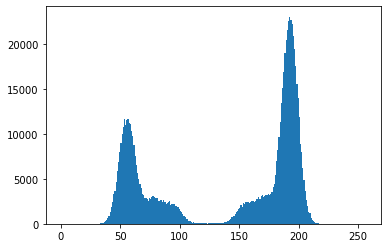

In [11]:
# Calculate the histogram
img1 = cv2.imread('C:/Users/DELL/Desktop/(noisy_fingerprint).tif',0)
hist = plt.hist(img1.ravel(),256,[0,256])
# Total pixels in the image
total = np.sum(hist[0])
# calculate the initial weights and the means
left, right = np.hsplit(hist[0],[0])
left_bins, right_bins = np.hsplit(hist[1],[0])
# left weights
w_0 = 0.0
# Right weights
w_1 = np.sum(right)/total
# Left mean
mean_0 = 0.0
weighted_sum_0 = 0.0
# Right mean
weighted_sum_1 = np.dot(right,right_bins[:-1])
mean_1 = weighted_sum_1/np.sum(right)
def recursive_otsu1(hist, w_0=w_0, w_1=w_1, weighted_sum_0=weighted_sum_0, weighted_sum_1=weighted_sum_1, thres=1, fn_max=-np.inf, thresh=0, total=total):
    if thres<=255:
        # To pass the division by zero warning
        if np.sum(hist[0][:thres+1]) !=0 and np.sum(hist[0][thres+1:]) !=0:
            # Update the weights
            w_0 += hist[0][thres]/total
            w_1 -= hist[0][thres]/total
            # Update the mean
            weighted_sum_0 += (hist[0][thres]*hist[1][thres])
            mean_0 = weighted_sum_0/np.sum(hist[0][:thres+1])
            weighted_sum_1 -= (hist[0][thres]*hist[1][thres])
            if thres == 255:
                mean_1 = 0.0
            else:
                mean_1 = weighted_sum_1/np.sum(hist[0][thres+1:])
            # Calculate the between-class variance
            out = w_0*w_1*((mean_0-mean_1)**2)
            # # if variance maximum, update it
            if out>fn_max:
                fn_max = out
                thresh = thres
        return recursive_otsu1(hist, w_0=w_0, w_1=w_1, weighted_sum_0=weighted_sum_0, weighted_sum_1=weighted_sum_1, thres=thres+1, fn_max=fn_max, thresh=thresh, total=total)
    # Stopping condition
    else:
        return fn_max,thresh
    
    
# Check the results
var_value, thresh_value = recursive_otsu1(hist, w_0=w_0, w_1=w_1, weighted_sum_0=weighted_sum_0, weighted_sum_1=weighted_sum_1, thres=1, fn_max=-np.inf, thresh=0, total=total)
print(var_value, thresh_value)

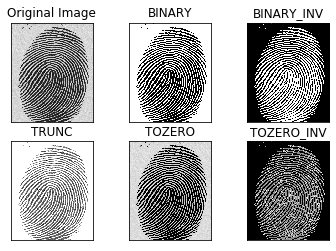

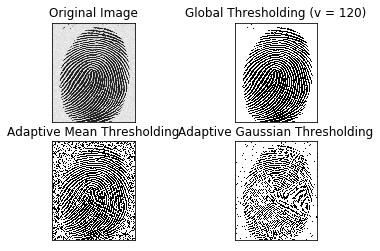

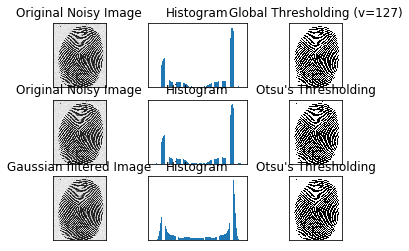

In [13]:

img = cv2.imread('C:/Users/DELL/Desktop/(noisy_fingerprint).tif',0)
ret,thresh1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,100,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,9,4)

titles = ['Original Image', 'Global Thresholding (v = 120)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
# global thresholding
ret1,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()